<a href="https://colab.research.google.com/github/lucywowen/csci547_ML/blob/main/examples/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This was adapted from this [article](https://junaidsqazi.medium.com/a44-support-vector-machines-svms-vs-logistic-regression-practice-comparisons-complete-58bbfd72acbe).

In this lecture, we will be working with three different datasets to compare the performance of SVMs and Logistic regression. The datasets are; MNIST, IRIS and Circles.

Let’s recall logistic regression and compare its performance with support vector machines. We will also explore the available kernel options in SVMs and compare their performance among each other and against simple logistic regression. We are going to work with three different datasets.



In [1]:
# Required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1.3) # setting font size for the whole notebook
sns.set_style('white') # if you want to set the style
from sklearn import svm, linear_model, datasets
from sklearn.model_selection import cross_val_score
#Retina display to see better quality images.
%config InlineBackend.figure_format = 'retina'
# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## MNIST
The MNIST (Modified National Institute of Standards and Technology) database of handwritten digits (28x28 pixel grayscale images) consist of 60,000 training and 10,000 test examples. The dataset is a subset of a larger set available from NIST Special Database 3 (digits written by employees of the United States Census Bureau) and Special Database 1 (digits written by high school students) which contain monochrome images of handwritten digits. The digits have been size-normalized and centered in a fixed-size image.

MNIST dataset is a widely used and deeply understood dataset. CNNs (Convolutional Neural Networks) are the top-performing deep learning models that achieve a classification accuracy of above 99%, with an error rate between 0.4% and 0.2% on the hold out test MNIST dataset.

A low resolution (8x8 pixel image) and small subset of MNIST data is included in scikit-learn machine learning library for practice as well.

Let’s load this sample dataset from scikit-learn datasets and see if we can classify the handwritten digits!

In [2]:
mnist= datasets.load_digits()
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

So, we need data and target keys to grab the data for our classification project — you can explore other fields yourself. If you notice, we have a key 'images' in the list which contains the 8x8 matrices of all the digits.

Let’s get the data in a dataframe df!

In [3]:
df=pd.DataFrame(data=mnist.data,columns=mnist.feature_names)
df['target']=mnist.target
print("We have {} numbers/observations in the data.".format(len(df)))

print("Unique target values are:{} \nand the respective class balance is:{}".format(df.target.unique(), df.target.value_counts().sort_index().values))
df.tail(2)


We have 1797 numbers/observations in the data.
Unique target values are:[0 1 2 3 4 5 6 7 8 9] 
and the respective class balance is:[178 182 177 183 181 182 181 179 174 180]


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0,8


We can see, there are 64 feature, each feature for individual pixel value in 8x8 matrix, right?

Now, if we want to graphically view the image, we can drop the target column from our dataframe df, and grab a row using iloc, then reshape it into 8x8 matrix and use imshow() from matplotlib to visualize the image, super easy!

## Visulaization

Let’s try to visualize some random observation/data-points at some random index, e.g. 1, 5, or -2 to see how the 8x8 image look like in MINIST dataset!



target value is: 9


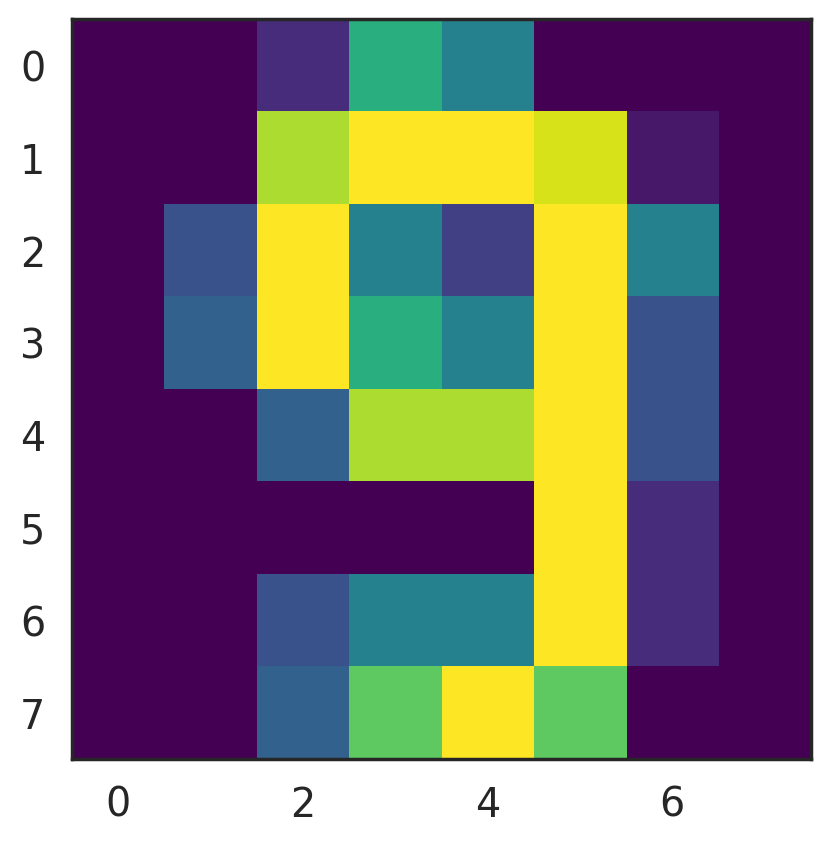

In [4]:
index=-2 #1, 5 or some other available index
number_at_0_index=np.array(df.drop('target', axis=1).iloc[index]).reshape(8,8)
print("target value is: {}".format(int(df.iloc[index] [-1])))
plt.imshow(number_at_0_index,cmap=plt.cm.viridis);

## Train the model
Let’s move on, separate features and the target. We can then train logistic regression and SVMs classifier and compare their performance.

In [5]:
digits_X, digits_y = df.drop('target',axis=1), df.target
#digits_X, digits_y = mnist.data, mnist.target

### Cross-validating logistic regression and SVM on the data
Well, we can start with default setting!



In [7]:
print("Cross-validated mean scores:")
LogR=linear_model.LogisticRegression (multi_class='multinomial')
# SVM with a linear kernel
print("\tUsing logistic regession is\t\t:{}".format(cross_val_score(estimator=LogR, X=digits_X, y=digits_y,cv=5, scoring='accuracy').mean()))
svc_linear = svm.SVC(kernel='linear')#, decision_function_shape='ovr')
svc_linear.fit(digits_X, digits_y)
print("\n\tUsing svc with linear kernel is\t\t: {}".format(cross_val_score(estimator=svc_linear, X=digits_X, y=digits_y,cv=5, scoring='accuracy').mean()))
# SVM with a gaussian kernel
svc_rbf= svm. SVC(kernel='rbf')
svc_rbf.fit(digits_X, digits_y)
print("\tUsing svc with rbf kernel is\t\t: {}".format(cross_val_score(estimator=svc_rbf,X=digits_X, y=digits_y,cv=5, scoring='accuracy').mean()))

Cross-validated mean scores:
	Using logistic regession is		:0.9137650882079852

	Using svc with linear kernel is		: 0.9476973073351903
	Using svc with rbf kernel is		: 0.9632838130609718


We tried logistic regression with default parameters for comparisons only, however it is not bad. Clearly, SVM gave better performance

## Hyperparameter tuning and the best model

### Gamma
Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning “far” and high values meaning “close”.

The higher the value of gamma, the more it will try to exactly fit the training data set. That will cause over-fitting problems.

- Small gamma: The model is constrained and can under-fit! It has high bias and low variance.

- Large gamma: The model tries to capture the shape too well: it can over-fit! It has low bias and high variance.

### C
C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly. C can be thought of as the parameter for the soft margin cost function, which controls the influence of each individual support vector.

- Small C: makes the decision surface smooth and simple, a softer margin can under-fit! Gives high bias and low variance.

- Large C: selects more support vectors: can over-fit! Gives a harder margin, low bias and high variance.

Along with gamma and C, we can look for best kernel in the gridsearch as well. The code below will do this all for you with 5 fold cross-validation (cv=5)!

In [8]:
import time
start=time.time()
from sklearn.model_selection import GridSearchCV

#The model
model = svm.SVC()

#Parameters grid
gamma_values = np.logspace (-5, 2, 10)
C_values = np.logspace(-3, 2, 10)
kernels = ['rbf', 'linear']
param_grid = dict(gamma=gamma_values, C=C_values, kernel=kernels)

# Grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid.fit(digits_X, digits_y)

print("GridSearch took {} sec".format(time.time()-start))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
GridSearch took 197.54771637916565 sec


So, the gridsearch took ~197 sec (~3.5 mins) on my machine. Depending upon your computer, expect different time to complete the search.

Well, let’s see what are the best suggested values of the parameters (C, gamma & kernel) from the given ones!

In [9]:
# check the results of the grid search
print("The best set of parameters is: ",grid.best_params_)
print("The best score is: ",grid.best_score_)
best_svm=grid.best_estimator_

The best set of parameters is:  {'C': 7.742636826811277, 'gamma': 0.00035938136638046257, 'kernel': 'rbf'}
The best score is:  0.9732930981120396


In [10]:
grid_results = pd.DataFrame(grid.cv_results_)
# we can separate the values of parameters in
# individual column from params dictionary as well.
grid_results['C'] = [x['C'] for x in grid_results.params.values]
grid_results['gamma'] = [x['gamma'] for x in grid_results.params.values]
grid_results['kernel'] = [x['kernel'] for x in grid_results.params.values]
grid_results['mean_score'] = grid_results ['mean_test_score']
#There are several columns, we are just grabing few!
grid_results[['C', 'gamma', 'kernel', 'mean_score']].sort_values( 'mean_score', ascending=False).head()
# In total, we have results equivalent to the number of
# candidates in the gridsearch, and we can # save all results as .csv file!

,C,gamma,kernel,mean_score
144,7.742637,0.000359,rbf,0.973293
164,27.825594,0.000359,rbf,0.973293
184,100.000000,0.000359,rbf,0.973293
124,2.154435,0.000359,rbf,0.968844
166,27.825594,0.002154,rbf,0.966069


So, the best model is our final model trained on complete dataset (we actually did not split data into train and test sets).

Let’ move on and work with IRIS dataset now!

## The iris dataset

### Model training and comparisons
We will load the iris data from scikit-learn and scale the features before we cross-validate both logistic regression and SVM classifiers.

In [12]:
# import data
iris = datasets.load_iris()
iris_X = iris.data # data 4
iris_y = iris.target # target

# rescaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_X = scaler.fit_transform(iris_X)

# Working with only 2 features, you can try all
X = iris_X[:,:2]

print("Cross-validated mean scores:")
# Testing logistic Regression with default parameters
LogR = linear_model.LogisticRegression()
print("\tUsing Logistic Regression\t:", cross_val_score(LogR, X, iris_y, cv=5, scoring='accuracy').mean())

# Testing SVM with default parameters
model = svm.SVC()
print("\tUsing SVMs\t\t\t:", cross_val_score(model, X, iris_y,cv=5, scoring='accuracy').mean())


Cross-validated mean scores:
	Using Logistic Regression	: 0.8133333333333332
	Using SVMs			: 0.8066666666666666


In the above code, we used default parameters for both classifiers. We have kernel options in SVM, let’s see how the three kernels (Gaussian/rbf and linear) work with the data using SVM.

In [13]:
# What about SVM with default parameters and different kernels using
# the same scaled data!
# The models

C=1.0
print("Scores from the selected models:")
linear_svc = svm.SVC(kernel='linear', C=C).fit(X, iris_y)
rbf_svc = svm. SVC (kernel='rbf', gamma=0.7, C=C).fit(X, iris_y)

# Scores
print("\tSVM with linear kernel\t\t:", linear_svc.score(X, iris_y))
print("\tSVM with RBF kernel\t\t:",rbf_svc.score(X, iris_y))


Scores from the selected models:
	SVM with linear kernel		: 0.8133333333333334
	SVM with RBF kernel		: 0.82


rbf kernel is actually giving us better score. Well, it might be good idea to see the decision boundaries that are set by three models with their respective kernels!

### SVM visualizing kernel effects

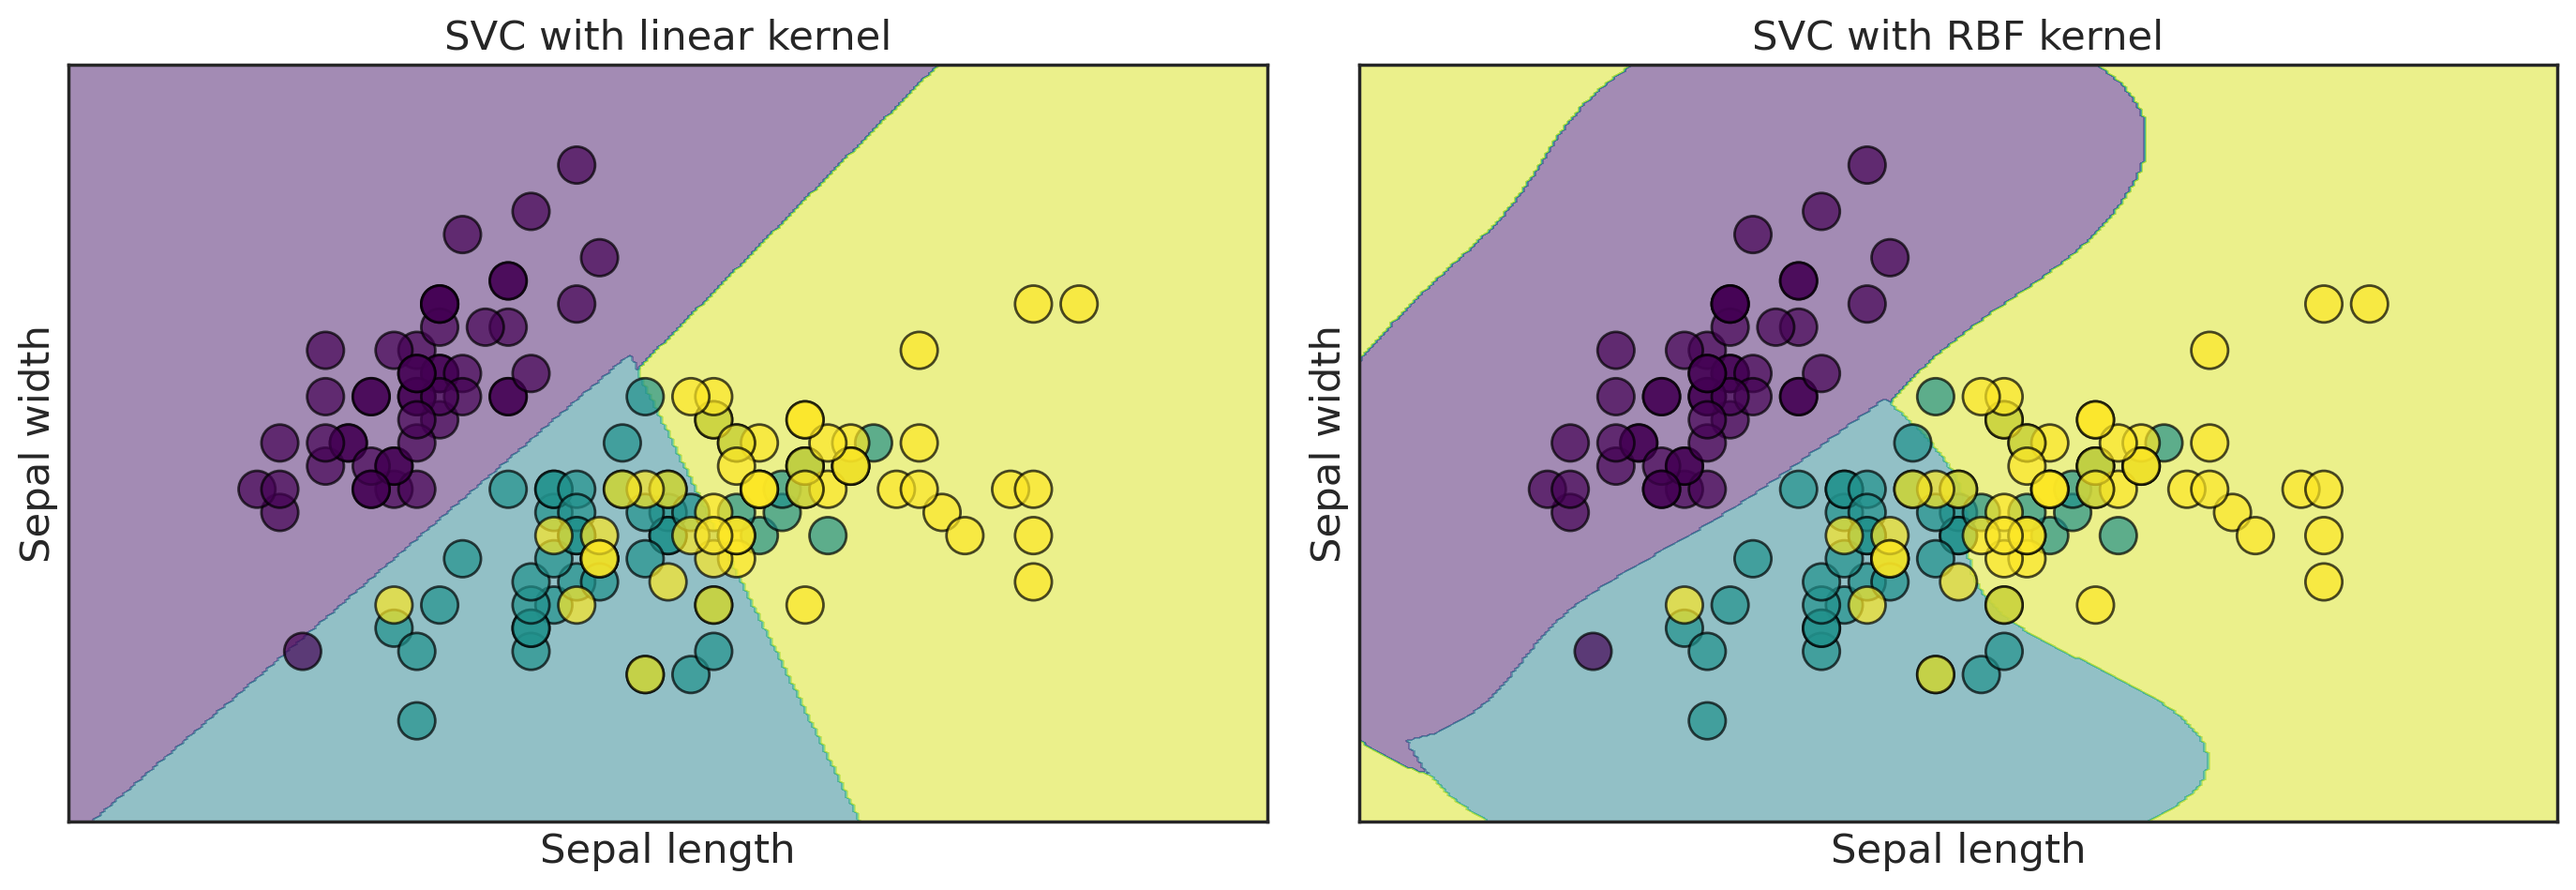

In [18]:
# Creating a mesh for the plots
x_min, x_max = iris_X[:, 0].min() - 1, iris_X[:, 0].max() + 1
y_min, y_max = iris_X[:, 1].min() - 1, iris_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

# title for the plots
titles= ['SVC with linear kernel','SVC with RBF kernel']

plt.figure(figsize=(14,5))
for i, model in enumerate((linear_svc, rbf_svc)):
  plt.subplot(1, 2, i + 1)
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha=0.5)
  # Plot also the training points
  plt.scatter(iris_X[:, 0], iris_X[:, 1],c=iris_y, cmap=plt.cm.viridis,s=200, edgecolors='black', alpha=0.7)
  plt.xlabel('Sepal length'); plt.ylabel('Sepal width')
  plt.xticks(()); plt.yticks(()); plt.title(titles[i])

plt.tight_layout()


Moving forward, let’s explore the real power of Support Vector Machines, which is its capability of classifying non-linearly separable data!

## The circles data — non-linearly separable data
Let’s create a data with circle within a circle using sklearn’s make_circles and compare cross-validated scores for logistic regression and different SVM kernels. The code below will do this all for you!

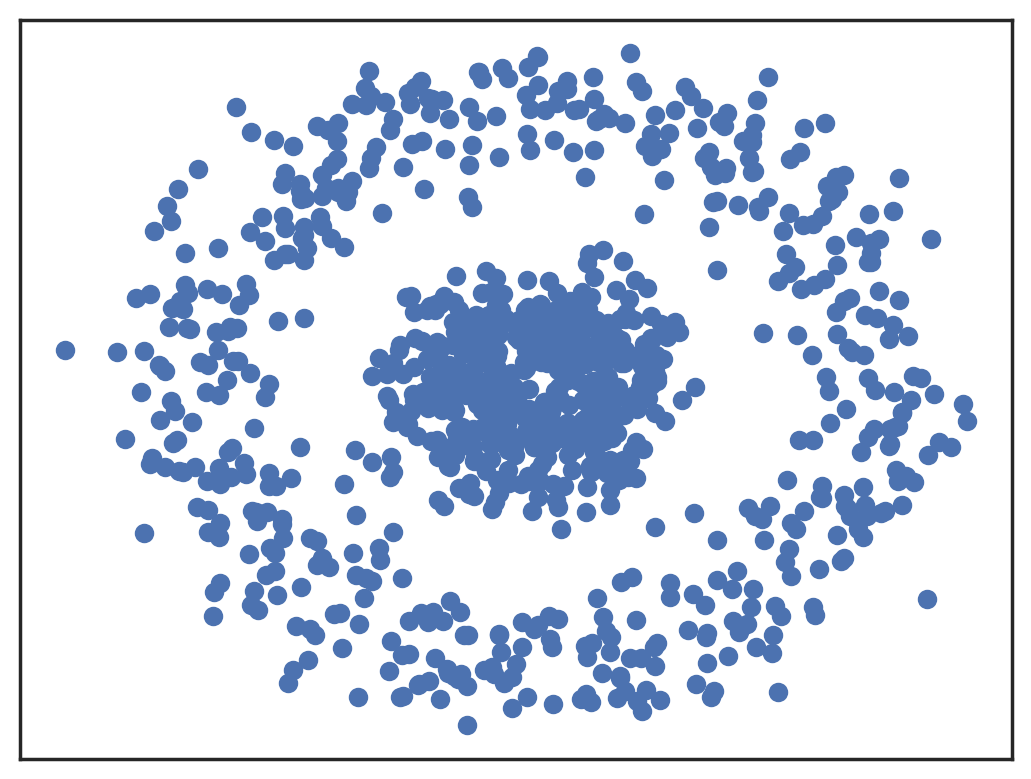

In [19]:
from sklearn.datasets import make_circles
# Making circles
circles_X, circles_y = make_circles (n_samples=1000, random_state=123, noise=0.14, factor=0.2)

# Scaling
circles_X = StandardScaler().fit_transform(circles_X)

# Plotting the data in case you want to visualize the data
plt.scatter(circles_X[:,0], circles_X[:,1])
plt.xticks(()); plt.yticks(());


In [21]:
# cross-validated mean scors:
print("Cross-validated mean scores:")
print("\tLogistic regression\t\t: ",cross_val_score(linear_model.LogisticRegression(), circles_X, circles_y, cv=5, scoring='accuracy').mean())
print("\tSVM Linear kernel\t\t: ", cross_val_score(svm.SVC(kernel = 'linear'), circles_X,circles_y, cv=5, scoring='accuracy').mean())
print("\tSVM RBF kernel\t\t\t: ",cross_val_score(svm.SVC(kernel = 'rbf'), circles_X,circles_y, cv=5, scoring='accuracy').mean())

Cross-validated mean scores:
	Logistic regression		:  0.49400000000000005
	SVM Linear kernel		:  0.635
	SVM RBF kernel			:  1.0


From the above scores, clearly, logistic regression is not the option for non-linearly separable data. However, we see rbf kernel is doing the magic for SVM and clearly separating classes with 100% accuracy. Well, we may want to visualize what is happening using different kernels in SVM and how they are actually working for this complex data.

### Visualizing kernel effects for circles data

We have used three kernels, linear, rbf and poly in the above code for SVM. Let’s plot the decision boundaries and see how they are classifying the complex dataset. Give sometime and understand the code below, it should be pretty simple at this stage of the course!

SVM scores are:
	with linear kernel	: 0.669
	with RBF kernel		: 1.0


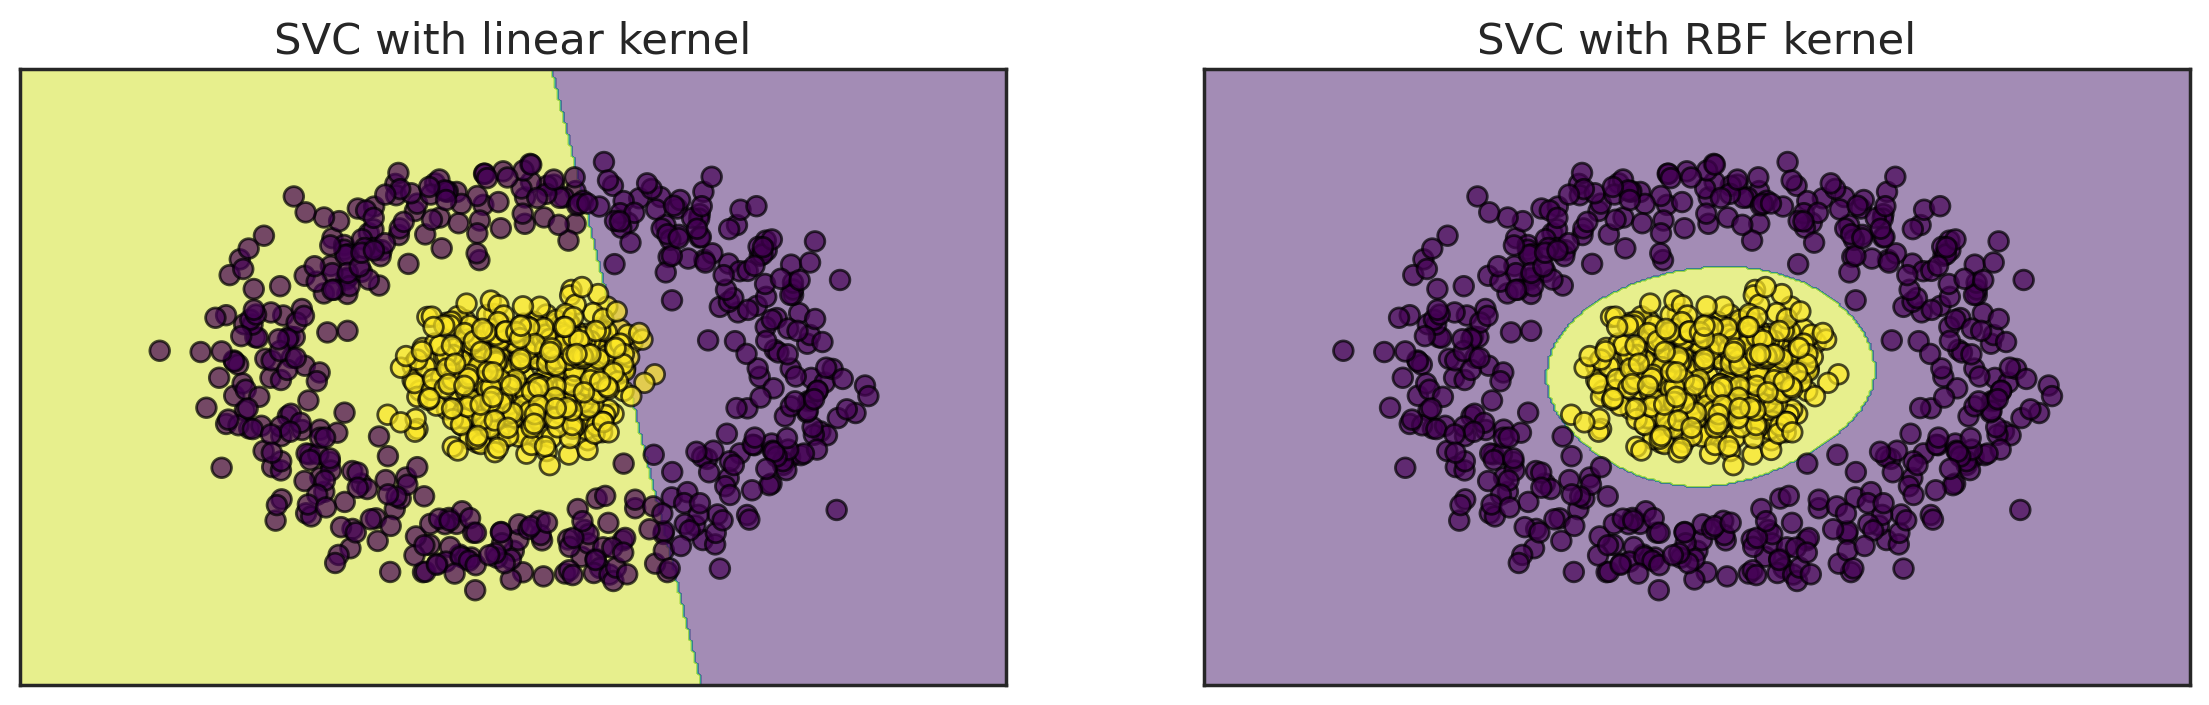

In [24]:
C = 1.0 # This is alos the default value in SVM regularization parameter
linear_svc = svm.SVC(kernel='linear', C=C).fit(circles_X, circles_y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(circles_X, circles_y) # default

print("SVM scores are:")
print("\twith linear kernel\t:", linear_svc.score(circles_X, circles_y))
print("\twith RBF kernel\t\t:",rbf_svc.score(circles_X, circles_y))

# Creating a mesh for the plots
x_min, x_max = circles_X[:, 0].min() - 1, circles_X[:, 0].max() + 1
y_min, y_max = circles_X[:, 1].min() - 1, circles_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

# title for the plots
titles= ['SVC with linear kernel','SVC with RBF kernel']

plt.figure(figsize=(14,4))
for i, clf in enumerate((linear_svc, rbf_svc)):
  plt.subplot(1, 2, i+1)
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  # Adding result on a color plot
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha=0.5)
  # Putting the training data
  plt.scatter(circles_X[:, 0], circles_X[:, 1], c=circles_y, s=50, edgecolors='black',cmap=plt.cm.viridis, alpha=0.7)
  plt.xticks(()); plt.yticks(()); plt.title(titles[i])

plt.show()

